In [1]:
import numpy
import pandas as pd

: 

In [2]:
# Load the CSV files into Pandas DataFrames
politifact_fake_df = pd.read_csv('GCN\datasets\politifact_fake.csv')
politifact_real_df = pd.read_csv('GCN\datasets\politifact_real.csv')
gossipcop_fake_df = pd.read_csv('GCN\datasets\gossipcop_fake.csv')
gossipcop_real_df = pd.read_csv('GCN\datasets\gossipcop_fake.csv')


In [3]:
politifact_fake_df.head()


,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


## First we  have to analyse the dataset

In [4]:


# Basic dataset information
print("Number of rows in fake news dataset:", politifact_fake_df.shape[0])
print("Number of columns in fake news dataset:", politifact_fake_df.shape[1])
print("Data types in fake news dataset:")
print(politifact_fake_df.dtypes)


# Check for missing values
print("Missing values in fake news dataset:")
print(politifact_fake_df.isnull().sum())

print("Missing values in real news dataset:")
print(politifact_real_df.isnull().sum())


Number of rows in fake news dataset: 432
Number of columns in fake news dataset: 4
Data types in fake news dataset:
id           object
news_url     object
title        object
tweet_ids    object
dtype: object
Missing values in fake news dataset:
id            0
news_url      4
title         0
tweet_ids    40
dtype: int64
Missing values in real news dataset:
id             0
news_url      57
title          0
tweet_ids    215
dtype: int64


In [5]:
# Drop rows with null values from the fake news dataset
politifact_fake_df = politifact_fake_df.dropna()

# Verify that null values have been removed
print("Number of rows after dropping null values in fake news dataset:", politifact_fake_df.shape[0])

# Drop rows with null values from the real news dataset
politifact_fake_df = politifact_real_df.dropna()

# Verify that null values have been removed
print("Number of rows after dropping null values in fake news dataset:", politifact_real_df.shape[0])

Number of rows after dropping null values in fake news dataset: 389
Number of rows after dropping null values in fake news dataset: 624


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
    


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ash_3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ash_3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:


stop_words = set(stopwords.words('english'))
politifact_fake_df.loc[:, 'title'] = politifact_fake_df['title'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word not in stop_words])

# Lowercase and tokenize the title column for real news (assuming it's already tokenized)
# Remove stopwords and punctuation for real news
politifact_real_df.loc[:, 'title'] = politifact_real_df['title'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word not in stop_words])






In [11]:
politifact_fake_df.head()


,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,"[national, federation, independent, business]",967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,"[comments, fayetteville, nc]",942953459\t8980098198\t16253717352\t1668513250...
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"[budget, united, states, government, fy, 2008]",89804710374154240\t91270460595109888\t96039619...
5,politifact14064,http://www.politifact.com/truth-o-meter/statem...,"[donald, trump, exaggerates, says, china, cont...",690248006399049728\t690254026663821312\t690276...
6,politifact14474,https://www.law.cornell.edu/constitution/amend...,"[25th, amendment]",1262604762\t10969740933\t11182364398\t17507543...


In [12]:
import pandas as pd
import networkx as nx

## Create a graph for the fake dataset 

In [13]:

# Create an empty directed graph for fake news
G_fake = nx.DiGraph()


In [14]:
# Iterate through the fake news dataset and add nodes (tweets) to the graph
for index, row in politifact_fake_df.iterrows():
    tweet_ids = row['tweet_ids'].split('\t')
    
    for tweet_id in tweet_ids:
        G_fake.add_node(tweet_id)

# Define and add edges to the fake news graph based on the 'id' column as the original tweet ID
for index, row in politifact_fake_df.iterrows():
    tweet_ids = row['tweet_ids'].split('\t')
    original_tweet_id = row['id']
    
    for tweet_id in tweet_ids:
        if original_tweet_id:
            G_fake.add_edge(tweet_id, original_tweet_id)


In [27]:
print("Number of nodes:", G_fake.number_of_nodes())
print("Number of edges:", G_fake.number_of_edges())
print("Is directed graph:", nx.is_directed(G_fake))



Number of nodes: 378936
Number of edges: 397243
Is directed graph: True


In [36]:



# Calculate the degrees of all nodes in the graph
degrees = dict(G_fake.degree())

# Find the node with the highest degree
node_with_highest_degree = max(degrees, key=degrees.get)

# Get the degree value of the node with the highest degree
highest_degree = degrees[node_with_highest_degree]

print("Node with the highest degree:", node_with_highest_degree)
print("Highest degree:", highest_degree)



Node with the highest degree: politifact12104
Highest degree: 27377


In [38]:


# Assuming you have a NetworkX graph named G_fake
degrees = [degree for node, degree in G_fake.degree()]

# Calculate the total number of degrees
total_degrees = sum(degrees)

# Print the total number of degrees
print("Total number of degrees in the graph:", total_degrees)


Total number of degrees in the graph: 794486


## Create a graph for the real dataset 

In [39]:

# Create an empty directed graph for fake news
G_real = nx.DiGraph()


In [40]:
# Iterate through the real news dataset and add nodes (tweets) to the graph
for index, row in politifact_real_df.iterrows():
    tweet_ids = str(row['tweet_ids']).split('\t')
    
    for tweet_id in tweet_ids:
        G_real.add_node(tweet_id)

# Define and add edges to the real news graph based on the 'id' column as the original tweet ID
for index, row in politifact_real_df.iterrows():
    tweet_ids = str(row['tweet_ids']).split('\t')
    original_tweet_id = str(row['id'])
    
    for tweet_id in tweet_ids:
        if original_tweet_id:
            G_real.add_edge(tweet_id, original_tweet_id)

In [41]:
print("Number of nodes:", G_real.number_of_nodes())
print("Number of edges:", G_real.number_of_edges())
print("Is directed graph:", nx.is_directed(G_real))


Number of nodes: 399862
Number of edges: 418379
Is directed graph: True


In [42]:

# Calculate the degrees of all nodes in the graph
degrees = dict(G_real.degree())

# Find the node with the highest degree
node_with_highest_degree = max(degrees, key=degrees.get)

# Get the degree value of the node with the highest degree
highest_degree = degrees[node_with_highest_degree]

print("Node with the highest degree:", node_with_highest_degree)
print("Highest degree:", highest_degree)


Node with the highest degree: politifact12104
Highest degree: 27377


In [43]:

# Assuming you have a NetworkX graph named G_fake
degrees = [degree for node, degree in G_real.degree()]

# Calculate the total number of degrees
total_degrees = sum(degrees)

# Print the total number of degrees
print("Total number of degrees in the graph:", total_degrees)

Total number of degrees in the graph: 836758


In [28]:
import networkx as nx

# Assuming G_fake is your NetworkX graph

# Specify the path where you want to save the GEXF file
output_path = "fake_news_graph.gexf"

# Export the graph to GEXF format
nx.write_gexf(G_fake, output_path)

print(f"Graph has been exported to {output_path}")


Graph has been exported to fake_news_graph.gexf


In [44]:


# Specify the path where you want to save the GEXF file
output_path = "real_news_graph.gexf"

# Export the graph to GEXF format
nx.write_gexf(G_fake, output_path)

print(f"Graph has been exported to {output_path}")

Graph has been exported to rea_news_graph.gexf


In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import random


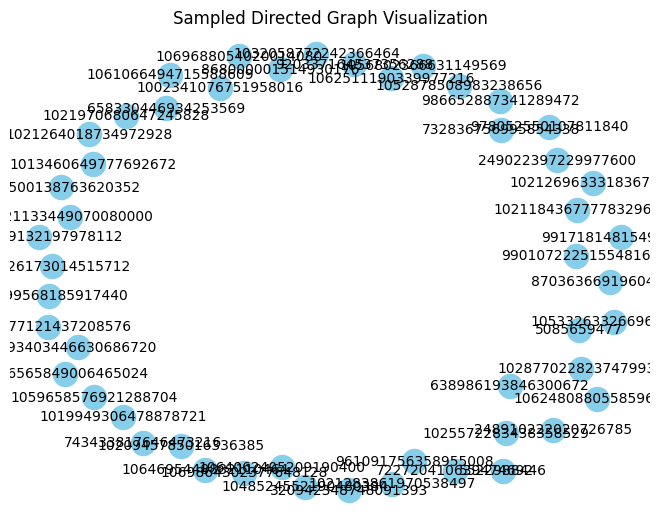

In [32]:


# Set a seed for reproducibility
random.seed(42)

# Define the number of nodes to sample (50 in this case)
num_nodes_to_sample = 50

# Convert the graph view into a list of nodes and then sample from it
node_list = list(G_fake.nodes())
sampled_nodes = random.sample(node_list, num_nodes_to_sample)

# Create a subgraph containing only the sampled nodes and their edges
subgraph = G_fake.subgraph(sampled_nodes)

# Define a layout for the nodes
pos = nx.spring_layout(subgraph)

# Draw the subgraph using Matplotlib
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_color="black", 
        width=1.5,  # Increase the width of edges
        arrows=True)

plt.title("Sampled Directed Graph Visualization")
plt.show()


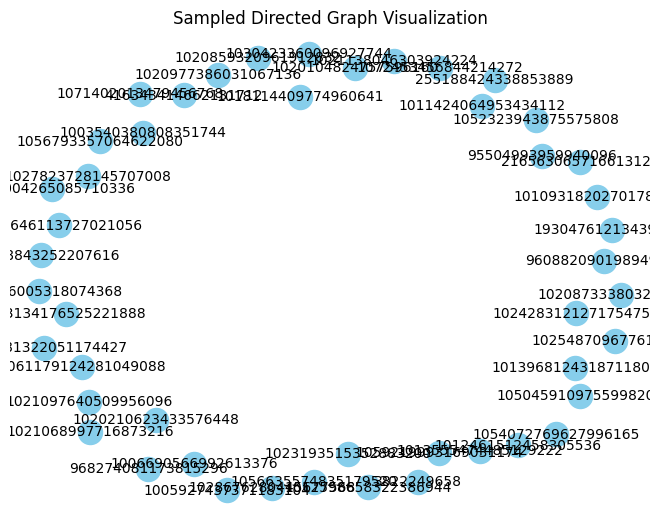

In [45]:


# Set a seed for reproducibility
random.seed(42)

# Define the number of nodes to sample (50 in this case)
num_nodes_to_sample = 50

# Convert the graph view into a list of nodes and then sample from it
node_list = list(G_real.nodes())
sampled_nodes = random.sample(node_list, num_nodes_to_sample)

# Create a subgraph containing only the sampled nodes and their edges
subgraph = G_fake.subgraph(sampled_nodes)

# Define a layout for the nodes
pos = nx.spring_layout(subgraph)

# Draw the subgraph using Matplotlib
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_color="black", 
        width=1.5,  # Increase the width of edges
        arrows=True)

plt.title("Sampled Directed Graph Visualization")
plt.show()


## Building a GCN for the datasets